In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw10.ipynb")

# Homework 10:  Confidence Intervals - v2

**Assigned Readings On These Topics from Class Schedule**: 

* [Bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)

* [Confidence Intervals](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html)

* [Using Confidence Intervals](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html)

* [Choosing a Sample Size](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html)



## Due Date: Thursday Nov 9th by 11:59 PM MT on Gradescope


## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing HW assignments in CSCI 3022.


The following would be some **examples of cheating** when working on HW assignments in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the HW before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Piazza!


If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1.1, 1.3 | 3 | auto
Question 1.2 | 3 | manual
Question 2.1-2.4 | 4 | auto
Question 2.5 | 5 | manual
Question 3 | 11 | auto
Question 4.1, 4.2 | 13 | manual
Question 4.3-4.9 | 11 | auto
|Total | 50

In [2]:
import pandas as pd
# These lines import the Numpy and Datascience modules.
import numpy as np
from matplotlib.ticker import PercentFormatter
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

## Question 1. Thai Restaurants in Boulder

Oswaldo and Varun are trying to see what the best Thai restaurant in Boulder is. They survey 1,500 CU Boulder students selected uniformly at random and ask each student what Thai restaurant is the best. (*Note: This data is fabricated for the purposes of this homework.*) The choices of Thai restaurants are [Aloy Thai](https://www.aloythai.com/), [Budda Cafe](https://www.buddhathaicuisine.com/menu), [Folsom Thai](https://www.folsomthaiatboulder.com/), and [Khow Thai](https://khow-thai.com/). After compiling the results, Oswaldo and Varun release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Aloy Thai| 8% |
|Khow Thai | 53% |
|Folsom Thai | 25% |
|Budda Cafe | 14% |

These percentages represent a uniform random sample of the population of CU Boulder students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the population (i.e. all CU Boulder students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of Oswaldo and Varun's survey.

In [3]:
# Just run this cell
votes = pd.read_csv('votes.csv')

**Question 1.1.** 

Oswaldo and Varun notice that in their sample, Khow Thai has received more than half of the votes.    They are interested in obtaining a confidence interval for the percentage of votes that Khow Thai will receive from the population.


To begin, complete the function `one_resampled_percentage` below. It should return Khow Thai's ***percentage*** of votes after taking the original table as input (`tbl`) and performing **one bootstrap sample** of it. Reminder that a percentage is between 0 and 100. 

*Note:* `tbl` will always be in the same format as `votes`.

*Hint:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**


In [4]:
votes["Vote"].value_counts()
def one_resampled_percentage(tbl):
    retbl = tbl.sample(frac = 1, replace = True)
    total = len(retbl)
    khow_thai = len(retbl[retbl["Vote"] == "Khow Thai"])
    # if len(retbl) == 0 or len(retbl[retbl['Thai Restaurant'] == 'Khow Thai']) == 0:
    #     return -1.0
    return (khow_thai/total) * 100
one_resampled_percentage(votes)

49.13333333333333

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.** 

a).  Complete the `percentages_in_resamples` function such that it simulates and returns a numpy array of 2022 elements, where each element represents a bootstrapped estimate of the percentage of voters who will vote for Khow Thai. You should use the `one_resampled_percentage` function you wrote above.


b).  Then run your function `percentages_in_resamples` and store the results in a numpy array called `resampled_percentages`.  Then create a density histogram of the entries in `resampled_percentages` array.  Label your axes and include a title on your plot. 



In [6]:
def percentages_in_resamples():
    resampled_percentages = np.zeros(2022)
    for i in range(2022):
        resampled_percentages[i] = one_resampled_percentage(votes)
    
    return resampled_percentages    
    


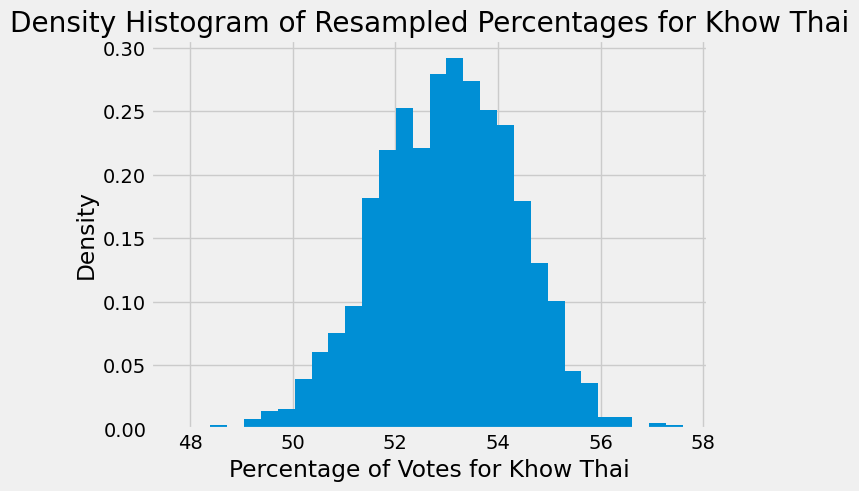

In [7]:
resampled_percentages = percentages_in_resamples()
plt.hist(resampled_percentages, bins=30, density=True)

plt.xlabel('Percentage of Votes for Khow Thai')
plt.ylabel('Density')
plt.title('Density Histogram of Resampled Percentages for Khow Thai')

plt.show()
# your code for histogram above this line

In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- END QUESTION -->

**Question 1.3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. Compute the lower and upper ends of the interval, named `khow_lower_bound` and `khow_upper_bound` respectively. 


In [9]:
khow_lower_bound = np.percentile(resampled_percentages, 2.5)
khow_upper_bound = np.percentile(resampled_percentages, 97.5)
print(f"Bootstrapped 95% confidence interval for the percentage of Khow Thai voters in the population: [{khow_lower_bound:.2f}, {khow_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Khow Thai voters in the population: [50.33, 55.47]


In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

## Question 2. Interpreting Confidence Intervals 

**Question 2.1.** Suppose we produced 6,000 new samples (each one a new/distinct uniform random sample of 1,500 students) from the population and created a 95% confidence interval for the percentage of people who vote for Khow Thai from each one. Roughly how many of those 6,000 intervals do you expect will actually contain the true percentage of the population? 

Assign your answer to `true_percentage_intervals`.


In [11]:
true_percentage_intervals = 0.95*6000

In [12]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** 


The staff computed the following 95% confidence interval for the percentage of Khow Thai voters: 

$$[50.53, 55.53]$$

(Your answer may have been a bit different due to randomness; that doesn't mean it was wrong!)

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Khow Thai equal to the percentage of votes for Aloy Thai, Folsom Thai, and Budda Cafe combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Khow Thai's percentage is 50%. Our alternative hypothesis is that Khow Thai's percentage is not equal to 50%  In the questions below, don't compute any confidence interval yourself—use only the staff's 95% confidence interval.

Say we use a 5% p-value cutoff. Do we reject the null, fail to reject the null, or are we unable to tell using the staff's confidence interval? 


Assign `cutoff_five_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


In [13]:
cutoff_five_percent = 1

In [14]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** What if, instead, we use a p-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval? 

Recall, the staff computed the following 95% confidence interval for the percentage of Khow Thai voters: 

$$[50.53, 55.53]$$


Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval


In [15]:
cutoff_one_percent = 3

In [16]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** What if we use a p-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval? 

The staff computed the following 95% confidence interval for the percentage of Khow Thai voters: 

$$[50.53, 55.53]$$



Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval


In [17]:
cutoff_ten_percent = 1

In [18]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5**. The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! **First**, match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below 

(e.g. __ % CI: [52.1, 54] $\rightarrow$ replace the blank with one of the three confidence levels).

**Then**, explain your thought process and how you came up with your answers. 

The intervals are below:

* [50.03, 55.94]
* [52.1, 54]
* [50.97, 54.99]



For the 99% confidence interval it shows that the interval is the widest, meaning it is the most range, thus it shows that it is very confident that the interval contains the true parameter.$99\% \approx 5.9$



For the 70% confidence level, it should be the one with the interval that is the narrowest that shows less precision in the estimate, as it is less confident about containing the true parameter compared to higher confidence levels.$70\% \approx 1.9$

For the 90% confidence the interval is wider than the 70%, while narrower than the 99%, thus the second largest confidence interval.$90\% \approx 4.02$

<!-- END QUESTION -->

## Question 3. Sample Size and Confidence Level

A data science class at the large University wants to estimate the **percent of students at the school who use Facebook.** To do this, they need to take a random sample of students. You can assume that their method of sampling is equivalent to drawing at random with replacement from students at the school.

***Please review [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook before proceeding with this section. Your work will go much faster that way!***

**Question 3.1.** Assign `smallest` to the **integer** (not float) that gives the smallest number of students they should sample to ensure that a **95%** confidence interval for the parameter has a width of no more than $6\%$ from left end to right end. 

*Hint:* How can our data be represented to show if a student in the sample is a Facebook user? Given this, what assumptions can we make for the SD of the population? [Section 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) might be helpful!

*Note:* Notice that the smallest sample size has to be an integer, so if you get a non-integer for an answer, you need to round it up to the nearest integer.  The `np.ceil` function may be helpful.


In [19]:
smallest = int(np.ceil(((4 * 0.5) / 0.06) ** 2))
smallest

1112

In [20]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Suppose the data science class decides to construct a 90% confidence interval instead of a 95% confidence interval, but they still require that the width of the interval is no more than 6% from left end to right end. Will they need the same sample size as in Question 3.1? 

Assign `sample_90` to the number corresponding to the correct answer.

1. Yes, they must use the same sample size.
2. No, a smaller sample size will work.
3. No, they will need a bigger sample.


In [21]:
sample_90 = 2

In [22]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** The professor tells the class that a 90% confidence interval for the parameter is constructed exactly like a 95% confidence interval, except that you have to go only 1.64 SDs on either side of the estimate (±1.64) instead of 2 SDs on either side (±2). Assign `smallest_num` to the smallest number of students they should sample to ensure that a **90%** confidence interval for the parameter has a width of no more than 6% from left end to right end. 

*Note:* Just like in Question 3.1, your answer should an **integer**. 


In [23]:
smallest_num = int(np.ceil(((2*1.64*0.5)/0.06)**2))
smallest_num

748

In [24]:
grader.check("q3_3")

q3_3 results: All test cases passed!

For this next exercise, please consult [Section 14.3.4](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html#the-standard-normal-cdf) of the textbook for similar examples.

The students are curious about how the professor came up with the value 1.64 in Question 3.3. 

To start, run the code below to visualize a plot of the standard normal distribution (with mean 0 and standard deviation 1).  

The `plt.fill_between` method shades in the region from -1.64 to +1.64 SDs. 


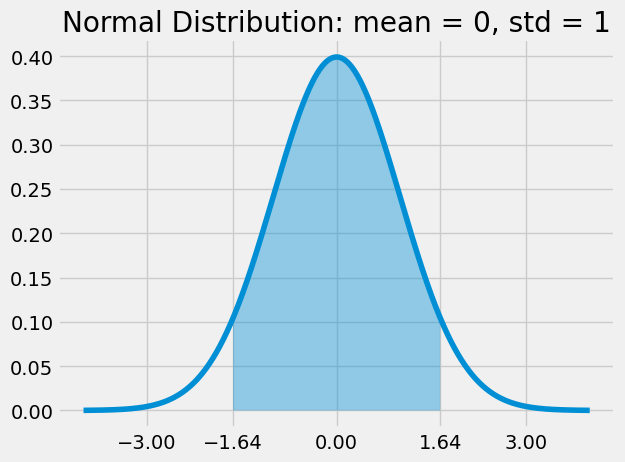

In [25]:
# Just run this cell
from scipy import stats


x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x,0))
plt.xticks([-3,-1.64,0,1.64,3])
plt.title("Normal Distribution: mean = 0, std = 1")
plt.fill_between(x, stats.norm.pdf(x,0), where=[(x > -1.64) and (x < 1.64) for x in x], alpha=0.4)


**Question 3.4.** To verify that 1.64 is in fact the correct cutoff for a 90% confidence interval, use built-in python functions to calculate the shaded area in the plot above.  Assign your answer to the variable `shaded_area`

*Hint:* Recall the acronym `cdf` stands for `cumulative distribution function`. It measures the proportion to the left of a specified point under a probability histogram.

In [26]:
shaded_area = stats.norm.cdf(1.64) - stats.norm.cdf(-1.64)
shaded_area


0.8989948330517925

In [27]:
grader.check("q3_4")

q3_4 results: All test cases passed!

The acronym `ppf` stands for `probability point function`.  It's the inverse of the `cdf`.  

Specifically, `ppf(y)` returns the exact point where the probability of everything to the left is equal to y. This can be thought of as the percentile function since the ppf tells us the value of a given percentile of the data.

To find the lower SD cut-off for a 90% confidence interval, notice that we want the value on the x-axis of the standard normal distribution such that the area to left is equal to $\frac{1-.90}{2}$ = 0.05

We can find this by running the following code:


In [28]:
stats.norm.ppf(.05)

-1.6448536269514729

In [29]:
-stats.norm.ppf(.05)

1.6448536269514729

**Question 3.5.** 

a).  To construct a 99% confidence interval for a parameter, how many SDs do you need to add and subtract to the sample estimate?   Give your answer as a positive value, rounded to the nearest hundredth.  Assign `SD_99` to your answer.  


b). Using your rounded answer for `SD_99` from part a, assign `smallest_num_99` to the **integer** (not float) that gives the smallest number of students you should sample to ensure that a **99%** confidence interval for the parameter has a width of no more than $6\%$ from left end to right end.  (Double check your answer by hand - depending on the order of operations you use you may inadvertendly end up with a floating point error that leads to the incorrect answer). 



In [30]:
SD_99 = round(abs(stats.norm.ppf(0.005)),2)
SD_99

2.58

In [31]:
smallest_num_99 = int(np.ceil(((SD_99)/0.06)**2))
smallest_num_99

1849

In [32]:
grader.check("q3_5")

q3_5 results: All test cases passed!

## Question 4. Polling and the Normal Distribution

Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal and vertical axes) called Yes on 68.  They want to know how many Coloradans will vote for the proposition.

Michelle polls a uniform random sample of all Colorado voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition. We have provided a table for you below which has 3 columns: the first two columns are identical to `sample`. The third column contains the proportion of total voters that chose each option.

In [33]:
sample = pd.DataFrame(data={"Vote": ["Yes", "No"],"Count": [210, 190]})

sample_size = sum(sample["Count"])
sample_with_proportions = sample.copy()
sample_with_proportions["Proportion"] = sample_with_proportions["Count"] / sample_size

sample_with_proportions

,Vote,Count,Proportion
0,Yes,210,0.525
1,No,190,0.475


<!-- BEGIN QUESTION -->

**Question 4.1.** Michelle wants to use 10,000 bootstrap resamples to compute a confidence interval for the proportion of all Colorado voters who will vote Yes.  


a). Use bootstrap resampling to simulate 10,000 election outcomes, and assign the np.array `resample_yes_proportions` to contain the Yes proportion of each bootstrap resample.   

b). Calculate the 95% bootstrapped confidence interval for the Yes proportion.


c).  Then, plot a density histogram of `resample_yes_proportions`.   Include a title and label both axes.  **You should see a bell shaped curve centered near the proportion of Yes in the original sample.**   We have provided code that overlays your confidence interval at the bottom of your histogram. 


In [34]:
sample = np.array([1] * 210 + [0] * 190)
num_simulations = 10_000
resampled_data = np.random.choice(sample, size=(num_simulations, len(sample)), replace=True)
resample_yes_proportions = np.sum(resampled_data, axis=1) / len(sample)


In [35]:
CI_lower = np.percentile(resample_yes_proportions, 2.5)
CI_upper = np.percentile(resample_yes_proportions, 97.5)
[CI_lower,CI_upper]

[0.475, 0.575]

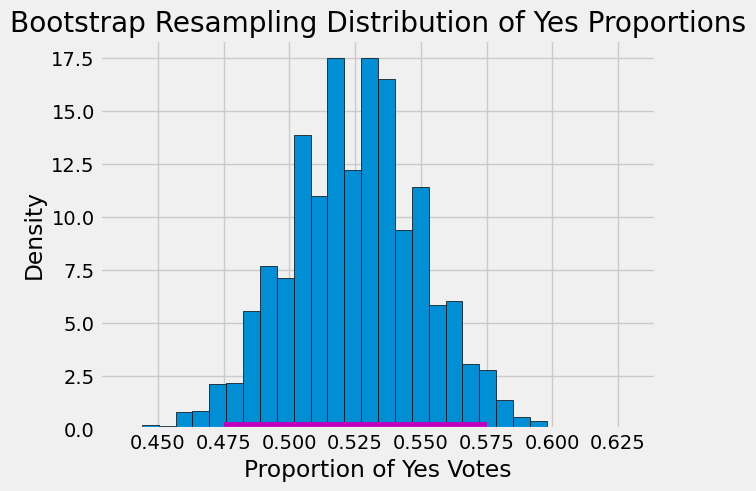

In [36]:
plt.hist(resample_yes_proportions, bins=30, density=True, edgecolor='black')
plt.title('Bootstrap Resampling Distribution of Yes Proportions')
plt.xlabel('Proportion of Yes Votes')
plt.ylabel('Density')
plt.plot(np.array([CI_lower, CI_upper]), np.array([0, 0]), c='m', lw=10)

plt.show()

In [37]:
grader.check("q4_1")

q4_1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.2.** 


a).  Why does the Central Limit Theorem (CLT) apply in this situation, and how does it explain the distribution we see above? 


b). Prove the following:  In a population whose members are 0 or 1, the **standard deviation** of that population is:


$$\text{standard deviation of population} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$


Write up your answers to both parts in the same Markdown cell below:

a) The CLT applies in this situation because the sample size bigger than 30, where it is a size of 10000 bootstrap samples. Each sampling is a proportion of people who votes yes out of the 400 people. This shows how the distribution is a bell shaped curve.

b)
Let p be the value that someone votes yes, and p - 1 that someone votes no.
SD = $\sqrt{Var(x)}$
$
E[X] = 1 \cdot p + 0 \cdot (1-p) = p \\
E[X^2] = 1^2 \cdot p + 0(1-p) = p \\
Var(x) = E[X^2] + (E[X])^2 = p - p^2 = p(1-p)
$

SD_P = $\sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})} = \sqrt{p(1-p)}$

<!-- END QUESTION -->

**Question 4.3.** 
In the following few questions we're going to walk through the steps to calculate our confidence interval using the Central Limit Theorem (and then we'll compare to the bootstrapped confidence interval we found in 4.1)

Using only the Central Limit Theorem and the numbers of Yes and No voters in our sample of 400, *algebraically* compute the predicted standard deviation of the `resample_yes_proportions` array. Assign this number to `approximate_sd`. **Do not access the data in `resample_yes_proportions` in any way.** 

Remember that the standard deviation of the sample means can be computed from the population SD and the size of the sample (the formula above might be helpful). If we do not know the population SD, we can use the sample SD as a reasonable approximation in its place. [This section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html#the-sd-of-all-the-sample-means) of the textbook also may be helpful.


In [38]:
approx_pop_sd = np.sqrt((210/400) * (1-(210/400)))
approximate_sd = approx_pop_sd/(np.sqrt(400))
approximate_sd

0.024968730444297725

In [39]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Compute the standard deviation of the array `resample_yes_proportions`, which will act as an approximation to the true SD of the possible sample proportions. This will help verify whether your answer to question 4.3 is approximately correct.


In [40]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.025136928407225898

In [41]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** **Again, without accessing `resample_yes_proportions` in any way**, use the Central Limit Theorem to compute an approximate 95% confidence interval for the proportion of Yes voters in California. 

Compare your answer to the bootstrapped confidence interval you found in Question 4.1.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

*Hint:* How many SDs corresponds to 95% of the distribution promised by the CLT? Recall the discussion in the textbook [here](https://inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).

*Hint:* The `approximate_sd` variable you previously defined may be helpful!


In [42]:
lower_limit = (210/400) - 2*(approximate_sd)
upper_limit = 210/400 + (2*approximate_sd)
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [43]:
grader.check("q4_5")

q4_5 results: All test cases passed!

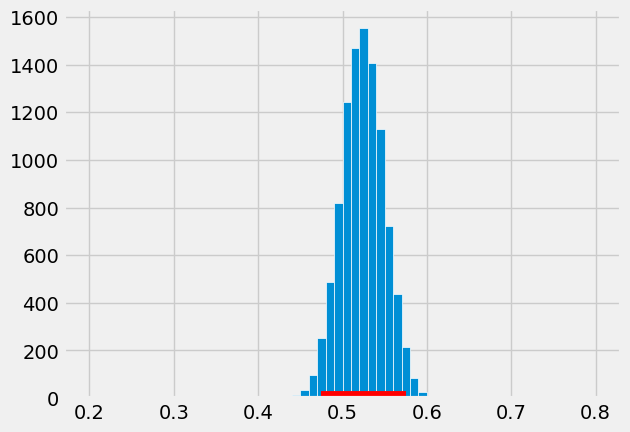

In [44]:
resample_yes_proportions_hist = plt.hist(resample_yes_proportions, edgecolor="white", bins=np.arange(.2,.8,.01))
plt.plot(np.array([lower_limit, upper_limit]), np.array([0, 0]), c='r', lw=10)

Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean (i.e. the Standard Error) was only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 14 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

**Question 4.6.** Does Michelle's sample size achieve the desired Standard Error (SE)? What SE would you achieve with a smaller sample size? A higher sample size?

To explore this, first compute the SD of sample means (i.e. the Standard Error) obtained by using Michelle's sample size.


In [45]:
estimated_population_sd = np.sqrt((210/400) * (1 - (210/400)))
michelle_sample_size = 9975
michelle_sample_mean_se = estimated_population_sd/ (np.sqrt(michelle_sample_size))
print("With Michelle's sample size, you would predict a standard error of %f." % michelle_sample_mean_se)

With Michelle's sample size, you would predict a standard error of 0.005000.


In [46]:
grader.check("q4_6")

q4_6 results: All test cases passed!

**Question 4.7.** Next, compute the standard error that you would get from a smaller sample size. Ideally, you should pick a number that is significantly smaller, but any sample size smaller than Michelle's will do. 


In [47]:
smaller_sample_size = 100
smaller_sample_mean_se = estimated_population_sd / (np.sqrt(smaller_sample_size))
print("With this smaller sample size, you would predict a sample mean SD of %f" % smaller_sample_mean_se)

With this smaller sample size, you would predict a sample mean SD of 0.049937


In [48]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 4.8.** Finally, compute the Standard Error that you would get from a larger sample size. Here, a number that is significantly larger would make any difference more obvious, but any sample size larger than Michelle's will do. 


In [49]:
larger_sample_size = 100_000
larger_sample_mean_se = estimated_population_sd / (np.sqrt(larger_sample_size))
print("With this larger sample size, you would predict a sample mean SD of %f" % larger_sample_mean_se)

With this larger sample size, you would predict a sample mean SD of 0.001579


In [50]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 4.9.** Based off of this, was Michelle's sample size approximately the minimum sufficient sample, given her assumption that the sample SD is the same as the population SD? Assign `min_sufficient` to `True` if 9,975 was indeed approximately the minimum sufficient sample, and `False` if it wasn't. 


In [51]:
min_sufficient = True
min_sufficient

True

In [52]:
grader.check("q3_9")

q3_9 results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 10!

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 10 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW 10 Autograded assignment in Gradescope.

* **Homework 10 Manually Graded**: Submit your hw10.PDF to the HW9 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw10.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [53]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q3_1 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_3 results: All test cases passed!

    q3_4 results: All test cases passed!

    q3_5 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_3 results: All test cases passed!

    q4_4 results: All test cases passed!

    q4_5 results: All test cases passed!

    q4_6 results: All test cases passed!

    q3_7 results: All test cases passed!

    q3_8 results: All test cases passed!

    q3_9 results: All test cases passed!
